# X800 - Mineração em Grafos
Prof. Erneson A. Oliveira<br>
MBA em Ciência de Dados<br>
Universidade de Fortaleza

# 1. Métricas e medidas de centralidade

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

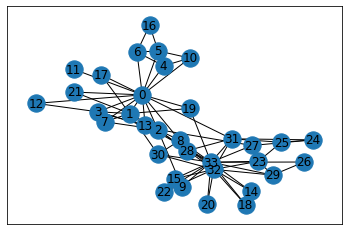

In [ ]:
G = nx.karate_club_graph()

def plot_network(G):
    fig, ax = plt.subplots()
    pos = nx.spring_layout(G, seed = 42)

    nx.draw_networkx(G, pos)

plot_network(G)

## 1.1 Comprimento do caminho médio

A distância geodésica média do vértice $i$ fica:

\begin{equation}
\ell_i=\frac{1}{n-1}\sum_{\substack{j=1\\(j\ne i)}}^n d_{ij}
,\nonumber
\end{equation}

onde $d_{ij}$ é o caminho geodésico do vértice $i$ para o vértice $j$.

In [ ]:
d = nx.shortest_path_length(G, source = 0)
print(d)

{0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 10: 1, 11: 1, 12: 1, 13: 1, 17: 1, 19: 1, 21: 1, 31: 1, 9: 2, 16: 2, 24: 2, 25: 2, 27: 2, 28: 2, 30: 2, 32: 2, 33: 2, 14: 3, 15: 3, 18: 3, 20: 3, 22: 3, 23: 3, 26: 3, 29: 3}


In [ ]:
d_0j = list(d.values())
ell_0 = sum(d_0j) / (len(d_0j) - 1)

print(ell_0)

1.7575757575757576


## 1.2 Média do comprimento do caminho médio

Dessa forma, a média do comprimento de caminho médio fica

\begin{equation}
\langle \ell \rangle = \frac{1}{n}\sum_{i=1}^n \ell_{i} = \frac{1}{n(n-1)}\sum_{i=1}^n \sum_{\substack{j=1\\(j\ne i)}}^n d_{ij}
.\nonumber
\end{equation}

In [ ]:
print(nx.average_shortest_path_length(G))

2.408199643493761


# 2. Transitividade

A relação $\bigcirc$ é dita transitiva se $A \bigcirc B$ e $B \bigcirc C$ implicam em $A \bigcirc C$.

## 2.1 Coeficiente de agrupamento

Definimos um "trio conectado" como três vértices $uvw$ com arestas $(u,v)$ e $(v,w)$.

![picture](https://drive.google.com/thumbnail?id=1cER5FRPMgO09yc15WMXrotiB3_VCQn97&sz=w400)

Nesse contexto, podemos escrever o coeficiente de agrupamento $C$ de uma rede como

\begin{equation}
C = \frac{\text{Número de triângulos}\times 3}{\text{Número de trios conectados}}
,\nonumber
\end{equation}

onde, os valores $C=1$ e $C=0$ implicam em transitividade perfeita e em ausência de triângulos (tríades fechadas), respectivamente. O fator de três no numerador aparece porque cada triângulo $uvw$ foi contado três vezes no denominador.

![picture](https://drive.google.com/thumbnail?id=1iH9dIzbF0dFoEWIgixm6ceZdOmUwU1k_&sz=w800)

In [ ]:
print(nx.transitivity(G))

0.2556818181818182


## 2.2 Coeficiente de agrupamento local

Para cada vértice $i$, podemos definir um coeficiente de agrupamento local dado por

\begin{equation}
C_i = \frac{\text{Número de pares de vizinhos de $i$ que estão conectados}}{\text{Número de pares de vizinhos de $i$}}
\nonumber
\end{equation}

Ou

\begin{equation}
C_i = \frac{T(u)}{k_u(k_u-1)/2}
,\nonumber
\end{equation}

onde T(u) é o número de triângulos que o vértice $u$ faz parte e $k_u$ é o grau do vértice $u$.

In [ ]:
print(list(nx.clustering(G).values()))

[0.15, 0.3333333333333333, 0.24444444444444444, 0.6666666666666666, 0.6666666666666666, 0.5, 0.5, 1.0, 0.5, 0, 0.6666666666666666, 0, 1.0, 0.6, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3333333333333333, 1.0, 1.0, 1.0, 0.4, 0.3333333333333333, 0.3333333333333333, 1.0, 0.16666666666666666, 0.3333333333333333, 0.6666666666666666, 0.5, 0.2, 0.19696969696969696, 0.11029411764705882]


## 2.3 Coeficiente de agrupamento de Watts-Strogatz (WS)

Podemos também definir um coeficiente de agrupamento de Watts-Strogatz que tende a favorecer vértices de baixo grau,

\begin{equation}
C_{WS} = \frac{1}{n} \sum_{i=1}^n C_i
.\nonumber
\end{equation}

In [ ]:
# print(np.mean(list(nx.clustering(G).values())))
print(nx.average_clustering(G))

0.5706384782076823


# 3. Medidas de centralidade
Quais são os vértices mais importantes da rede?

![picture](https://drive.google.com/thumbnail?id=1uiKVr4ueKK1CDcoM5FNbt57buMCVYF5z&sz=w600)

## 3.1 Centralidade de grau

A centralidade de grau mede a influência de um vértice através do seu grau.

![picture](https://drive.google.com/thumbnail?id=1wj09msFfVZi_kmOMaUlIBZJbWDpjcsIo&sz=w400)

### 3.1.1 Solução exata

Matematicamente,

\begin{equation}
x_i=\sum_{j=1}^n A_{ij}
\quad \text{ou}\quad
\mathbf{x}=\mathbf{A}\mathbf{1}
,\quad\text{onde}\quad
\mathbf{A} = (\mathbf{A})_{ij} = (A_{ij}) =
\begin{bmatrix}
A_{11} & A_{12} & \cdots & A_{1n}\\
A_{21} & A_{22} & \cdots & A_{2n}\\
\vdots & \vdots & \ddots & \vdots\\
A_{n1} & A_{n2} & \cdots & A_{nn}
\end{bmatrix}
\quad\text{e}\quad
\mathbf{1}=
\begin{bmatrix}
1\\
1\\
\vdots\\
1
\end{bmatrix}
.\nonumber
\end{equation}

Lembrando que para a matriz de adjacência:

\begin{equation}
A_{ij} =
\begin{cases}
1\text{, se existe aresta entre $i$ e $j$}.\\
0\text{, caso contrário.}
\end{cases}
\nonumber
\end{equation}

In [ ]:
print(G.degree)

[(0, 16), (1, 9), (2, 10), (3, 6), (4, 3), (5, 4), (6, 4), (7, 4), (8, 5), (9, 2), (10, 3), (11, 1), (12, 2), (13, 5), (14, 2), (15, 2), (16, 2), (17, 2), (18, 2), (19, 3), (20, 2), (21, 2), (22, 2), (23, 5), (24, 3), (25, 3), (26, 2), (27, 4), (28, 3), (29, 4), (30, 4), (31, 6), (32, 12), (33, 17)]


In [ ]:
print(dict(G.degree))

{0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17}


In [ ]:
#print(G.degree) # print(dict(G.degree))

print(G.degree[0], G.degree[33])

16 17


Counter({2: 11, 3: 6, 4: 6, 5: 3, 6: 2, 16: 1, 9: 1, 10: 1, 1: 1, 12: 1, 17: 1})


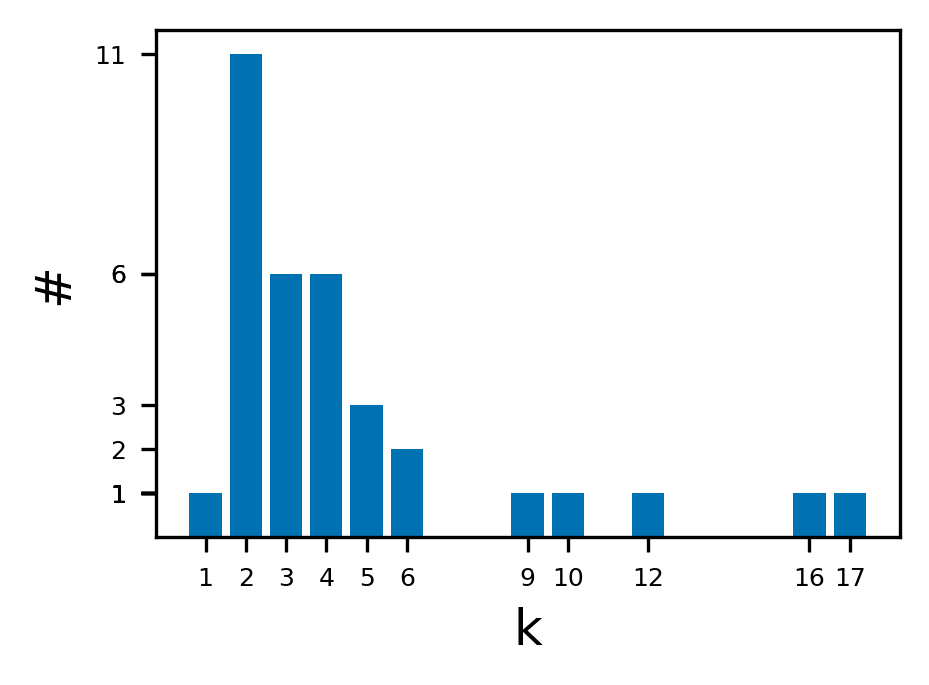

In [ ]:
list_of_degrees = list(dict(G.degree).values())
counter = Counter(list_of_degrees)
print(counter)

x = list(counter.keys())
y = list(counter.values())

def plot_bar(x,y):
    figx = 3.2
    figy = (7/10)*figx
    fig, ax = plt.subplots(figsize=(figx,figy),dpi=300)
    myplot = ax.bar(x,
                    y,
                    color = '#0072B2',
                    align = 'center')

    ax.set_xlabel('k',fontsize='12')
    ax.set_ylabel('#',fontsize='12')

    ax.set_xticks(x)
    ax.set_yticks(y)

    ax.set_xticklabels(x,fontsize='6')
    ax.set_yticklabels(y,fontsize='6')

plot_bar(x,y)

## 3.2 Centralidade de autovetor

Centralidade de autovalor mede a influência de um vértice através de dois fatores: O seu grau e a importância dos seus vizinhos.

![picture](https://drive.google.com/thumbnail?id=1AJlWZX1SLZwdNEM2DMzp_cmpiACHWVKb&sz=w400)

### 3.2.1 Processo iterativo

\begin{equation}
x_i'=\sum_{j=1}^n A_{ij}x_j
\quad \text{ou}\quad
\mathbf{x}'=\mathbf{A}\mathbf{x}
,\quad\text{onde}\quad
\mathbf{x}=
\begin{bmatrix}
x_1\\
x_2\\
\vdots\\
x_n
\end{bmatrix}
.\nonumber
\end{equation}

Dado um critério de parada e um "chute inicial" $\mathbf{x}(0)$ para a medida de centralidade $\mathbf{x}(t)$.

### 3.2.2 Solução exata

Para um tempo $t>0$, podemos escrever:

\begin{equation}
\mathbf{x}(t)=\mathbf{A}\mathbf{x}(t-1)=\mathbf{A}^2\mathbf{x}(t-2)=\cdots=\mathbf{A}^t \mathbf{x}(0)
.\nonumber
\end{equation}

Escrevendo $\mathbf{x}(0)$ como uma combinação linear dos autovetores $\mathbf{v}_i$ da matriz $\mathbf{A}$:

\begin{equation}
\mathbf{x}(0)=\sum_{i=1}^nc_i\mathbf{v_i}
,\nonumber
\end{equation}

onde $\mathbf{A}\mathbf{v}_i=\kappa_i\mathbf{v}_i$. Portanto,

\begin{equation}
\mathbf{x}(t)=
\mathbf{A}^t \sum_{i=1}^n c_i \mathbf{v}_i =
\sum_{i=1}^n c_i (\mathbf{A}^t\mathbf{v}_i) =
\sum_{i=1}^n c_i (\kappa_i^t\mathbf{v}_i) =
\kappa_1^t\sum_{i=1}^n c_i \left(\frac{\kappa_i}{\kappa_1}\right)^t \mathbf{v}_i
,\nonumber
\end{equation}

supondo que $\kappa_1>\kappa_2>\cdots>\kappa_n$. Para $t\rightarrow\infty$,

\begin{equation}
\mathbf{x}(t)=c_1\kappa_1^t\mathbf{v}_1
.\nonumber
\end{equation}

Dada a Equação de Autovalor-Autovetor:

\begin{equation}
\mathbf{A}\mathbf{v}_1=\kappa_1\mathbf{v}_1
\quad \Rightarrow \quad
(c_1\kappa_1^t)\mathbf{A}\mathbf{v}_1=(c_1\kappa_1^t)\kappa_1\mathbf{v}_1
\quad \Rightarrow \quad
\mathbf{A}\mathbf{x}=\kappa_1\mathbf{x}
.\nonumber
\end{equation}

Portanto,

\begin{equation}
\mathbf{x}=\kappa_1^{-1}\mathbf{A}\mathbf{x}
\quad \Rightarrow \quad
(\mathbf{1}-\kappa_1^{-1}\mathbf{A})\mathbf{x}=\mathbf{0}
.\nonumber
\end{equation}

A solução desse sistema linear de equações é a centralidade de autovetor. Essa relação para cada vértice $i$ pode ser escrita como:

\begin{equation}
x_i=\kappa_1^{-1}\sum_{j=1}^n A_{ij}x_j
.\nonumber
\end{equation}

{0: 0.3554834941851943, 1: 0.2659538704545025, 2: 0.3171893899684447, 3: 0.21117407832057059, 4: 0.0759664588165738, 5: 0.07948057788594245, 6: 0.07948057788594245, 7: 0.17095511498035434, 8: 0.2274050914716605, 9: 0.10267519030637756, 10: 0.0759664588165738, 11: 0.052854169452336466, 12: 0.08425192086558085, 13: 0.22646969838808145, 14: 0.10140627846270832, 15: 0.10140627846270832, 16: 0.02363479426059687, 17: 0.09239675666845952, 18: 0.10140627846270832, 19: 0.14791134007618664, 20: 0.10140627846270832, 21: 0.09239675666845952, 22: 0.10140627846270832, 23: 0.15012328691726784, 24: 0.05705373563802805, 25: 0.059208202502790096, 26: 0.07558192219009324, 27: 0.13347932684333305, 28: 0.13107925627221215, 29: 0.13496528673866567, 30: 0.17476027834493085, 31: 0.191036269797917, 32: 0.30865104773369595, 33: 0.373371213013235}


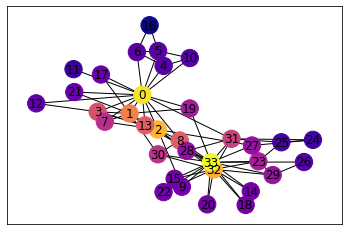

In [ ]:
eigenvector_centrality = nx.eigenvector_centrality(G)

print(eigenvector_centrality)

def plot_network(G,x):
    fig,ax = plt.subplots()
    pos = nx.spring_layout(G,
                           seed=42)

    nx.draw_networkx(G,
                     pos,
                     cmap=plt.cm.plasma,
                     node_color=list(x.values()),
                     nodelist=x.keys())

plot_network(G,eigenvector_centrality)

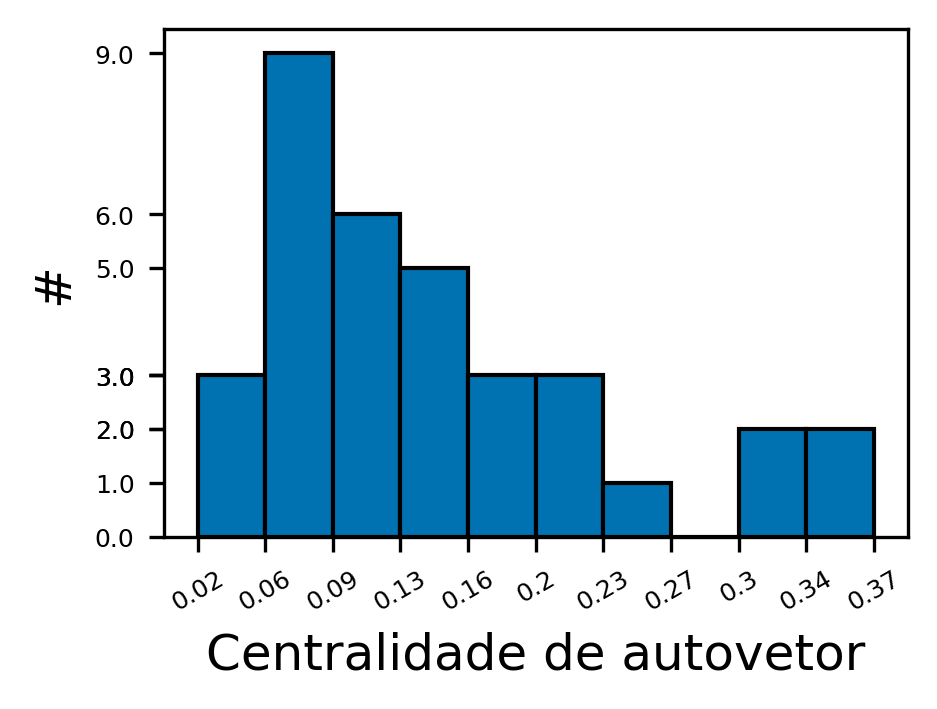

In [ ]:
def plot_hist(x,xlabel):
    figx = 3.2
    figy = (7/10)*figx
    fig, ax = plt.subplots(figsize=(figx,figy),dpi=300)
    n, bins, patches = ax.hist(x,
                               color='#0072B2',
                               edgecolor='#000000')

    ax.set_xlabel(xlabel,fontsize='12')
    ax.set_ylabel('#',fontsize='12')

#     delta = bins[1] - bins[0]
#     ax.set_xticks(bins[:-1] + delta/2)
#     ax.set_yticks(n)
#     xticklabels = [round(X,2) for X in bins[:-1] + delta/2]

    ax.set_xticks(bins)
    ax.set_yticks(n)
    xticklabels = [round(b,2) for b in bins]

    ax.set_xticklabels(xticklabels,fontsize='6',rotation=30)
    ax.set_yticklabels(n,fontsize='6')

plot_hist(eigenvector_centrality.values(),'Centralidade de autovetor')

### 3.2.3 Limitações

Existem complicações para redes dirigidas:

* Autovetor da esquerda e autovetor da direita;
* Apenas vértices que estão em um componente fortemente conectado de dois ou mais vértices (ou em um componente de saída) podem ter centralidade de autovetor não-nula.

Portanto, a seguinte situação é um problema:

![picture](https://drive.google.com/thumbnail?id=16Q2vDrbR5KUv5OHebvtX9XL5czJ7Hn8H&sz=w400)

## 3.3 Centralidade de Katz

Centralidade de Katz, bem como a centralidade de autovetor, mede a influência de um vértice através de dois fatores: O seu grau e a importância dos seus vizinhos. A diferença é que, inicialmente, defini-se uma pequena quantidade de centralidade para cada vértice da rede.

![picture](https://drive.google.com/thumbnail?id=1U3WJ9AA_cZ6eAfENbUzl3eNrK2F3buvk&sz=w400)

### 3.3.1 Processo iterativo

\begin{equation}
x_i'=\alpha\sum_{j=1}^n A_{ij}x_j + \beta
\quad \text{ou}\quad
\mathbf{x}'=\alpha\mathbf{A}\mathbf{x}+\beta\mathbf{1}
.\nonumber
\end{equation}

onde $\alpha$ e $\beta$ são constantes positivas.

### 3.3.2 Solução exata

De maneira análoga ao caso da centralidade de autovetor, podemos escrever a centralidade de Katz como:

\begin{equation}
\mathbf{x}=\alpha\mathbf{A}\mathbf{x}+\beta\mathbf{1}
\quad \Rightarrow \quad
\mathbf{x}=(\mathbf{I}-\alpha\mathbf{A})^{-1}\beta\mathbf{1}
.\nonumber
\end{equation}

onde $\mathbf{I}$ é a matriz identidade. A relação para cada vértice $i$ pode ser escrita como:

\begin{equation}
x_i=\alpha\sum_{j=1}^n A_{ij}x_j+\beta
.\nonumber
\end{equation}

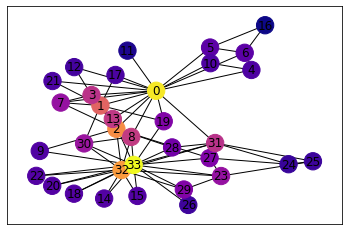

In [ ]:
katz_centrality = nx.katz_centrality(G)

plot_network(G,katz_centrality)

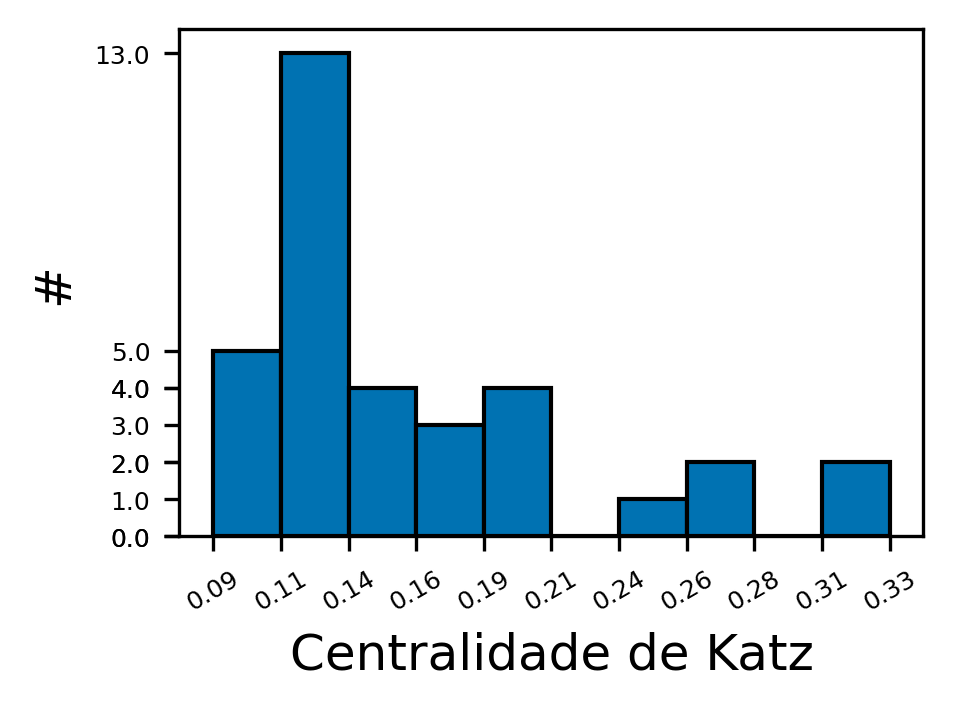

In [ ]:
plot_hist(katz_centrality.values(),'Centralidade de Katz')

### 3.2.3 Limitações

Existem complicações para redes não-dirigidas e dirigidas:

* Se um vértice com alta centralidade de Katz tem muitas arestas apontando para outros vértices, então esses outros vértices também terão alta centralidade de Katz.

Em alguns casos, tal modelagem pode não ser desejável:

![picture](https://drive.google.com/thumbnail?id=1ummtr8DFwCZBHXSxjHtKIN9r4xlmMqCZ&sz=w400)

## 3.4 PageRank

PageRank, bem como a Centralidade de Katz, mede a influência de um vértice através de dois fatores: O seu grau e a importância atenuada dos seus vizinhos.

![picture](https://drive.google.com/thumbnail?id=1U3WJ9AA_cZ6eAfENbUzl3eNrK2F3buvk&sz=w400)

### 3.4.1 Processo iterativo

\begin{equation}
x_i'=\alpha\sum_{j=1}^n A_{ij}\frac{x_j}{k_j^{out}} + \beta
\quad\text{ou}\quad
\mathbf{x}'=\alpha\mathbf{A}\mathbf{D}^{-1}\mathbf{x}+\beta\mathbf{1}
.\nonumber
\end{equation}

onde $\mathbf{D}$ é uma matriz diagonal tal que $D_{ii}=max(k_i^{out},1)$.

### 3.4.2 Solução exata

De maneira análoga ao caso da centralidade de autovetor, podemos escrever o PageRank como:

\begin{equation}
\mathbf{x}=\alpha\mathbf{A}\mathbf{D}^{-1}\mathbf{x}+\beta\mathbf{1}
\quad \Rightarrow \quad
\mathbf{x}=\mathbf{D}(\mathbf{D}-\alpha\mathbf{A})^{-1}\beta\mathbf{1}
.\nonumber
\end{equation}

A relação para cada vértice $i$ pode ser escrita como:

\begin{equation}
x_i=\alpha\sum_{j=1}^n A_{ij}\frac{x_j}{k_j^{out}}+\beta
,\nonumber
\end{equation}

Se $k_i^{out}=0$, então, artificialmente, fazemos $k_i^{out}=1$.

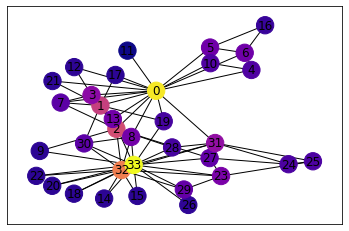

In [ ]:
pagerank = nx.pagerank(G)

plot_network(G,pagerank)

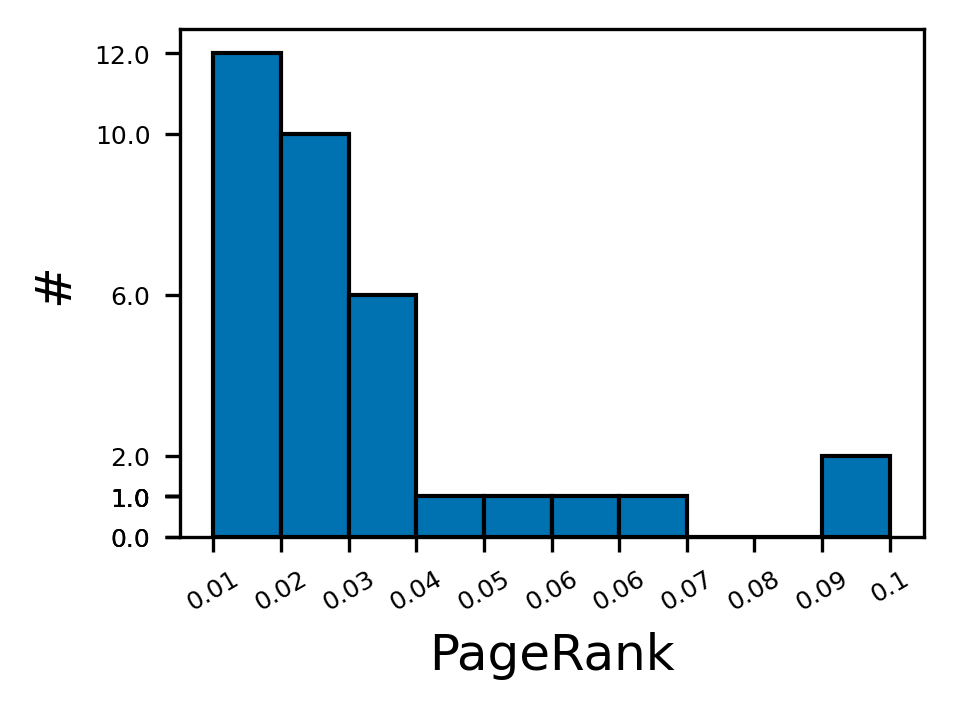

In [ ]:
plot_hist(pagerank.values(),'PageRank')

## 3.5 Centralidade de proximidade

A centralidade de proximidade do vértice $i$ pode ser definida como:

\begin{equation}
C_i=\frac{1}{\ell_i}=\frac{n}{\sum_{j=1}^n d_{ij}}
.\nonumber
\end{equation}

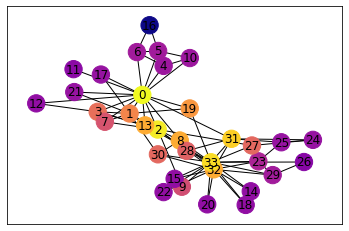

In [ ]:
closeness_centrality = nx.closeness_centrality(G)

plot_network(G,closeness_centrality)

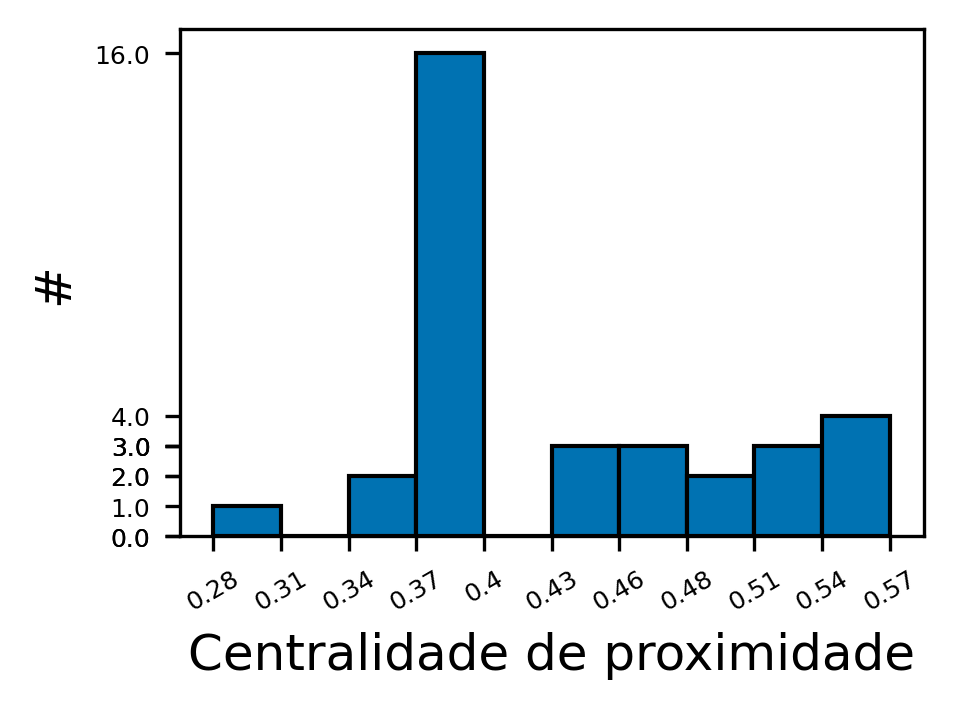

In [ ]:
plot_hist(closeness_centrality.values(),'Centralidade de proximidade')

# 4. Assortatividade



![picture](https://drive.google.com/thumbnail?id=1A9X8vtdsaPiZvgxcLHdy5OaCzqbE5q5b&sz=w400)

In [ ]:
r_grau = nx.degree_assortativity_coefficient(G)
r_grau

-0.47561309768461413

In [ ]:
G.nodes.data()

NodeDataView({0: {'club': 'Mr. Hi'}, 1: {'club': 'Mr. Hi'}, 2: {'club': 'Mr. Hi'}, 3: {'club': 'Mr. Hi'}, 4: {'club': 'Mr. Hi'}, 5: {'club': 'Mr. Hi'}, 6: {'club': 'Mr. Hi'}, 7: {'club': 'Mr. Hi'}, 8: {'club': 'Mr. Hi'}, 9: {'club': 'Officer'}, 10: {'club': 'Mr. Hi'}, 11: {'club': 'Mr. Hi'}, 12: {'club': 'Mr. Hi'}, 13: {'club': 'Mr. Hi'}, 14: {'club': 'Officer'}, 15: {'club': 'Officer'}, 16: {'club': 'Mr. Hi'}, 17: {'club': 'Mr. Hi'}, 18: {'club': 'Officer'}, 19: {'club': 'Mr. Hi'}, 20: {'club': 'Officer'}, 21: {'club': 'Mr. Hi'}, 22: {'club': 'Officer'}, 23: {'club': 'Officer'}, 24: {'club': 'Officer'}, 25: {'club': 'Officer'}, 26: {'club': 'Officer'}, 27: {'club': 'Officer'}, 28: {'club': 'Officer'}, 29: {'club': 'Officer'}, 30: {'club': 'Officer'}, 31: {'club': 'Officer'}, 32: {'club': 'Officer'}, 33: {'club': 'Officer'}})

In [ ]:
r_atributo = nx.attribute_assortativity_coefficient(G, 'club')
r_atributo

0.717530864197531

# 5. Detecção de comunidade

![picture](https://drive.google.com/thumbnail?id=1BaQUrCMlnldSrjGeNVzCcexOzYXUS9fA&sz=w400)


In [ ]:
from networkx.algorithms.community import girvan_newman

comunidades = girvan_newman(G)

tuple(sorted(c) for c in next(comunidades))

([0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

# 6. Referências

[1] Newman, M. Networks: an introduction. Oxford University Press, 2018.

[2] http://networksciencebook.com/

[2] https://networkx.org/documentation/stable/reference/index.html